In [ ]:
from difflib import SequenceMatcher

from hol import config
from hol.models import AnchoredCount

levels = AnchoredCount.levels()

mdw_cache = config.mem.cache(AnchoredCount.mdw)

level_mdw = {
    level: mdw_cache(level1=level, level2=level)
    for level in levels
}

### level -> mdw size

In [17]:
for level, mdw in level_mdw.items():
    print(level, len(mdw))

1 9481
2 9404
3 9315
4 9202
5 9071
6 8922
7 8721
8 8528
9 8199
10 7840
11 7387
12 6846
13 6415
14 5874
15 5239
16 4610
17 4086
18 3291
19 3552
20 2412
21 2807
22 1960
23 1799
24 2422
25 1994
26 1207
27 1106
28 906
29 646
30 759
31 840
32 951
33 361
34 734
35 310
36 456
38 410
39 593
40 175
41 222
42 215
43 245
44 317
46 174
49 244
53 189
54 211
57 125
60 132


### Synchronic edit distance from level 1

The edit distance between the MDWs for each successive level (for all years) and the level 1 list:

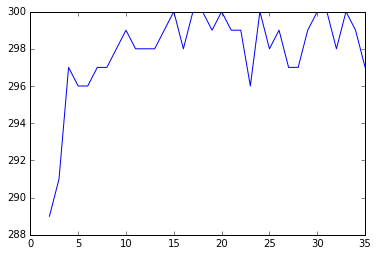

In [34]:
from distance import levenshtein

%matplotlib inline
import matplotlib.pyplot as plt

topn1 = list(level_mdw[1].keys())[:300]

ratios = {}
for level in levels[1:35]:
    topni = list(level_mdw[level].keys())[:300]
    ratios[level] = levenshtein(topn1, topni)

plt.plot(*zip(*ratios.items()))

- everything packerup near the top, within 10 of the max.
- spikes up quickly, levels off slightly at ~5, then increases more slowly up to the max.

### Sliding pairwise edit distance between ranks

The edit distance between each successive pair of levels - (1,2), (3,4), etc.

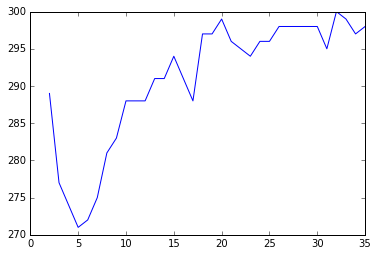

In [37]:
from hol.utils import window

ratios = {}
for w in window(levels[:35], 2):
    
    topn1 = list(level_mdw[w[0]].keys())[:300]
    topn2 = list(level_mdw[w[-1]].keys())[:300]
    
    ratios[w[-1]] = levenshtein(topn1, topn2)
    
plt.plot(*zip(*ratios.items()))

- around 5, from 4-6, the rate of change is slower, the successive lists more similar.
- 5 is an inflection point? the place around which the community is most stable?
- as the level goes up towards 30, the overall volume shoots way down - is the rate of change just a sampling issue?